In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## 1. Data loading and exploration

### Load data

In [ ]:
data = pd.read_csv("owid-covid-data.csv")


### Check columns

In [8]:
print(data.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### Preview rows

In [12]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


### Identify missing values

In [30]:
print(data.isnull().sum())

iso_code                                       0
continent                                      0
location                                       0
date                                           0
total_cases                                  277
                                           ...  
population                                     0
excess_mortality_cumulative_absolute       12813
excess_mortality_cumulative                12813
excess_mortality                           12813
excess_mortality_cumulative_per_million    12813
Length: 67, dtype: int64


## 2. Data cleaning

### Filter countries of interest

In [27]:
countries = ["Kenya", "United States", "India", "Brazil", "Germany", "France", "Italy", "Spain", "Russia", "China"]
data = data[data["location"].isin(countries)]

### Drop rows with missing dates

In [34]:
keycolumns = ['continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_fully_vaccinated', 'population']
data = data[keycolumns]

### Convert date column into datetime

In [35]:
data["date"] = pd.to_datetime(data["date"])

### Handle missing numeric values

In [36]:
missing_percent = (data.isnull().sum() / len(data)) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

people_fully_vaccinated    54.044303
total_vaccinations         48.611011
total_deaths                4.019049
total_cases                 1.998701
new_cases                   1.262717
new_deaths                  1.212209
dtype: float64


## 3. Exploratory data analysis

### Plot total cases over time for selected countries

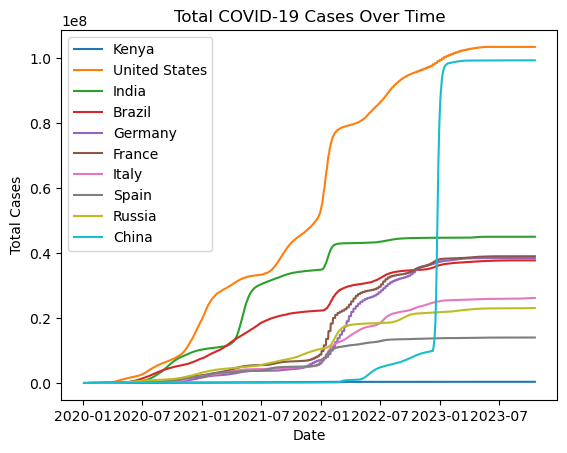

In [39]:
for country in countries:
    plt.plot(data[data['location'] == country]['date'],
             data[data['location'] == country]['total_cases'],
             label = country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

### Plot total deaths over time

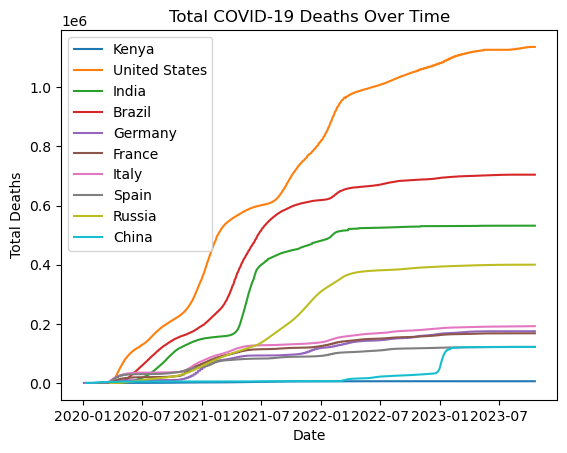

In [42]:
for country in countries:
    plt.plot(data[data['location'] == country]['date'],
             data[data['location'] == country]['total_deaths'],
             label = country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()

### Compare daily new cases between countries

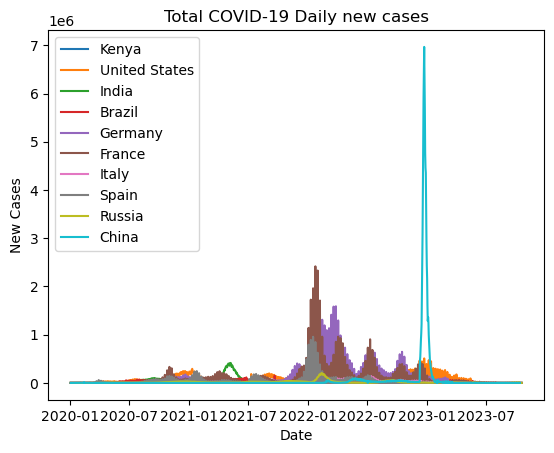

In [43]:
for country in countries:
    plt.plot(data[data['location'] == country]['date'],
             data[data['location'] == country]['new_cases'],
             label = country)
plt.title("Total COVID-19 Daily new cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()

### Calculate the death rate: ```total_deaths / total_cases```

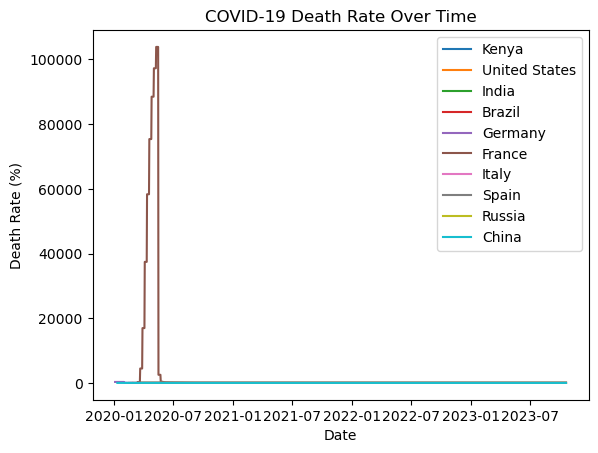

In [47]:
data['death_rate'] = data['total_deaths'] / data['total_cases'] * 100

for country in countries:
    plt.plot(data[data['location'] == country]['date'],
             data[data['location'] == country]['death_rate'],
             label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate (%)")
plt.legend()
plt.show()

## 4. Visualizing vaccination process

### Cumulative vaccinations over time

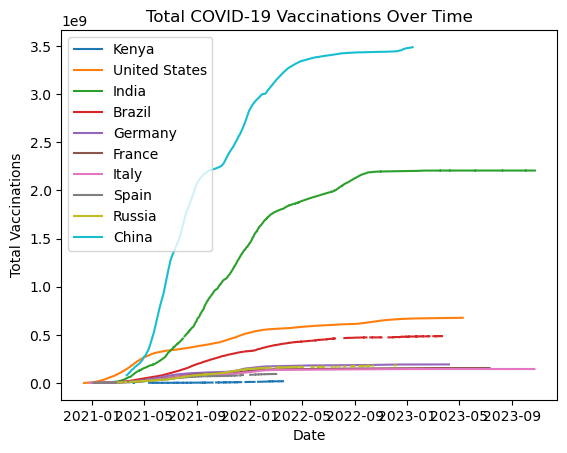

In [50]:
for country in countries:
    plt.plot(data[data['location'] == country]['date'],
             data[data['location'] == country]['total_vaccinations'],
             label=country)
plt.title("Total COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()

### Compare % vaccinated population

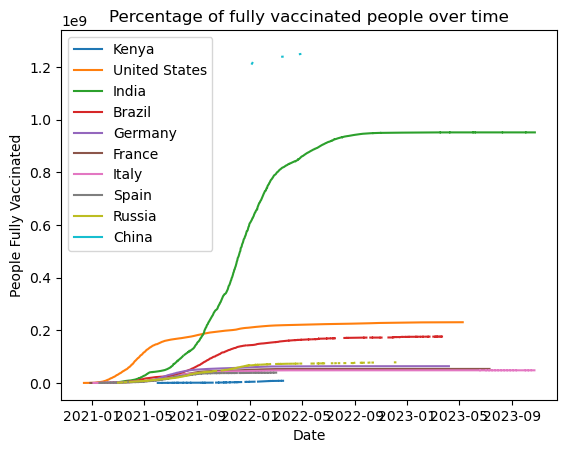

In [53]:
for country in countries:
    plt.plot(data[data['location'] == country]['date'],
             data[data['location'] == country]['people_fully_vaccinated'],
             label=country)
plt.title("Percentage of fully vaccinated people over time")
plt.xlabel("Date")
plt.ylabel("People Fully Vaccinated")
plt.legend()
plt.show()

## 5. Build a Choropleth map

In [57]:
latest_data = data.sort_values('date').groupby('location').tail(1)

In [61]:
fig = px.choropleth(
    latest_data,
    locations="location",
    locationmode="country names",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="greens",
    title="Total COVID-19 Cases (Latest Available Data)",
    labels={'total_cases': 'Total Cases'}
)
fig.show()

## 6. Insights and Reporting

### Key Insights summary

- **Vaccine Rollout:** Among the selected countries, the United States and Germany demonstrated the fastest initial vaccine rollout, with a rapid increase in both total and fully vaccinated individuals. Kenya and India showed a slower but steady increase in vaccination rates.
- **Trends in Cases and Deaths:** The United States, India, and Brazil experienced the highest total number of COVID-19 cases and deaths over the observed period. Notably, India had significant spikes in new cases during mid-2021, corresponding to the Delta variant wave.
- **Death Rate Differences:** European countries like Germany, France, Italy, and Spain generally exhibited lower death rates relative to total cases compared to Brazil and the United States, possibly reflecting differences in healthcare capacity and public health interventions.
- **Population Impact:** Despite having a large population, China reported relatively low case and death numbers, which may be attributed to strict containment measures and reporting practices.
- **Vaccination Coverage:** By the latest available data, most European countries and the United States achieved higher percentages of fully vaccinated populations compared to Kenya and India.


### Highlight Anomalies and Patterns

- **Reporting Anomalies:** Some countries, such as China and Russia, display unusually flat or abrupt changes in case and death counts, suggesting possible underreporting or data lags.
- **Outlier Events:** India experienced a dramatic spike in new cases and deaths during the Delta wave, standing out as a significant outlier compared to other countries during that period.
- **Vaccination Uptake Patterns:** Kenya's vaccination curve remained much flatter than other countries, highlighting disparities in vaccine access and distribution.
- **Death Rate Fluctuations:** Early in the pandemic, several countries showed high death rates due to limited testing and overwhelmed healthcare systems, which gradually decreased as testing and treatment improved.
- **Plateau Effects:** In some countries, the number of new cases and deaths plateaued after major vaccination milestones, indicating a potential correlation between vaccination coverage and pandemic control.